In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Description :

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

### Task:
To make a mode that can consider the data provided and predict the Average Price.

In [4]:
#importing data set

In [5]:
df = pd.read_csv("Avocado.csv")

In [397]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [346]:
df1["Unnamed: 0"] = df["Unnamed: 0"]
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Unnamed: 0
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,2
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,11
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,12
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,13


## Table Content:

The table represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 


Starting in 2013, the table reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 


The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [347]:
df1.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
Unnamed: 0               int64
dtype: object

In [11]:
import datetime

In [348]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   int32         
 11  year          1517 non-null   int64         
 12  region        1517 non-null   int32         
 13  Unnamed: 0    1517 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(2)
memory usage: 154.2 KB


In [349]:
df1.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Unnamed: 0      0
dtype: int64

no null values

In [14]:
#data cleaning

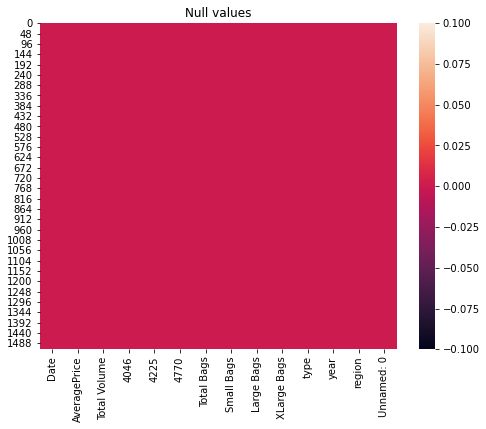

In [350]:
plt.figure(figsize = [8,6])
sns.heatmap(df1.isnull())
plt.title('Null values')
plt.show()

No null values

In [351]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Unnamed: 0
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440,26.995386
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398,14.848287
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000,14.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000,29.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000,39.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000,51.000000


In [353]:
df1_analysis = ["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","Unnamed: 0"]

In [354]:
print("observations:")
for i in df1_analysis:
    print("Mean of the ",i,"is :", round(df1[i].mean(),3))
    print("Median of the ",i,"is :",round(df1[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(df1[i].std(),3))
    print("Minimum value of ",i,"is :", round(df1[i].min(),3))
    print("75th Quantile of ",i,"is :", round(df1[i].quantile(0.75),3))
    print("Maximum value of ",i,"is :", round(df1[i].max(),3))
    x = input("Observation : \n")
    print("\n\n")

observations:
Mean of the  AveragePrice is : 1.075
Median of the  AveragePrice is : 1.08
Standard deviation of  AveragePrice is : 0.189
Minimum value of  AveragePrice is : 0.49
75th Quantile of  AveragePrice is : 1.19
Maximum value of  AveragePrice is : 1.68
Observation : 
The mean and median are almost similar. standard deviation is very low.Very less difference between maximum value and 75th quantile.



Mean of the  Total Volume is : 1601879.068
Median of the  Total Volume is : 402791.86
Standard deviation of  Total Volume is : 4433142.821
Minimum value of  Total Volume is : 38750.74
75th Quantile of  Total Volume is : 981975.08
Maximum value of  Total Volume is : 44655461.51
Observation : 
Very huge difference between mean and median.Very high standard deviation, and a huge difference between 75th quantile and maximum. 



Mean of the  4046 is : 646438.654
Median of the  4046 is : 81751.17
Standard deviation of  4046 is : 1947613.57
Minimum value of  4046 is : 467.72
75th Quantile 

In [19]:
#data cleaning

In [20]:
#converting to date time

In [21]:
df1["Date"]=pd.to_datetime(df1["Date"])

In [355]:
df1.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
Unnamed: 0               int64
dtype: object

In [356]:
print(df['type'].value_counts())

conventional    1517
Name: type, dtype: int64


In [357]:
# encoding datas
from sklearn.preprocessing import LabelEncoder

In [358]:
le = LabelEncoder()

In [359]:
df1["type"] = le.fit_transform(df1["type"])

In [27]:
df1["type"]

0       0
1       0
2       0
3       0
4       0
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: type, Length: 1517, dtype: int32

In [28]:
#region
df1["region"] = le.fit_transform(df1["region"])

In [360]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Unnamed: 0
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,2
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,11
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,12
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,13


In [30]:
#encoded

In [31]:
#using box plot

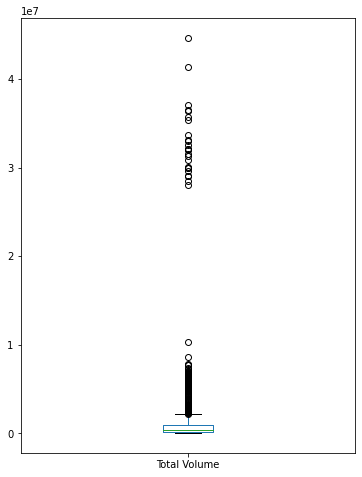

In [32]:
plt.figure(figsize = [6,8])
df1["Total Volume"].plot.box()

Observations: Outliers are present far from the whiskers.

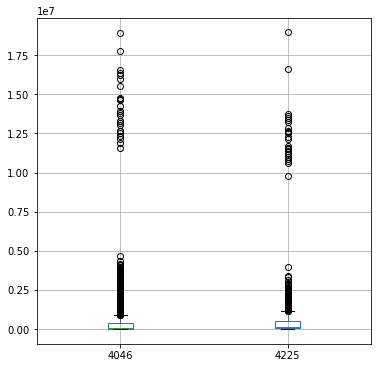

In [33]:
plt.figure(figsize = [6,6])
df1[["4046","4225"]].boxplot()

observations: Outliers are present far from the whiskers.and some are near to the whisker.

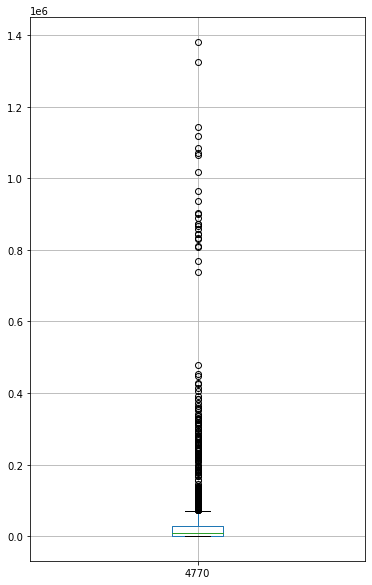

In [34]:
plt.figure(figsize = [6,10])
df1[["4770"]].boxplot()

observations: Outliers are present far from the whiskers.and some are near to the whisker.

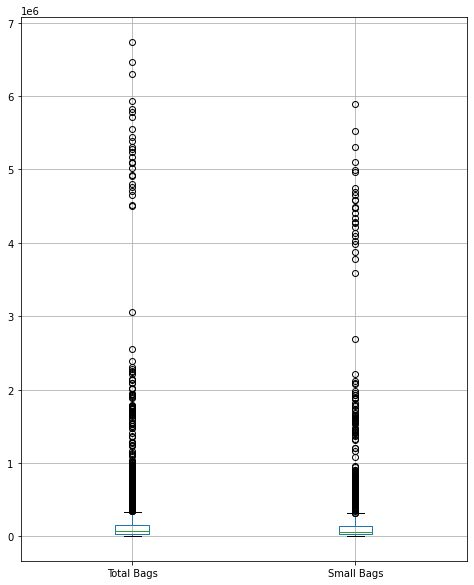

In [35]:
plt.figure(figsize = [8,10])
df1[["Total Bags","Small Bags"]].boxplot()

observations: Outliers are present far from the whiskers.and some are near to the whisker.

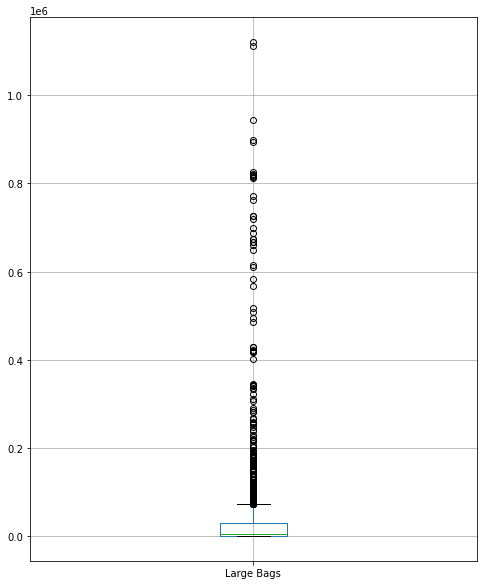

In [36]:
plt.figure(figsize = [8,10])
df1[["Large Bags"]].boxplot()

observations: Outliers are present far from the whiskers.and some are near to the whisker.

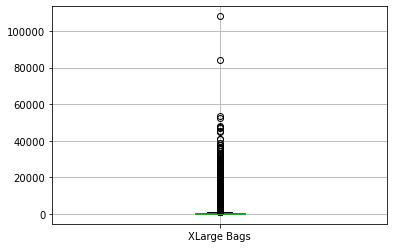

In [37]:
plt.figure(figsize = [6,4])
df1[["XLarge Bags"]].boxplot()

observations: Few Outliers are present far from the whiskers,and most of them are near to the whisker.

In [38]:
from scipy.stats import zscore

In [39]:
Outliers_remove = df1[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [40]:
z = np.abs(zscore(Outliers_remove))

In [41]:
threshold = 3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412, 1016, 1017, 1059, 1182, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1183,
       1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185, 1185,
       1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186, 1186,
       1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188, 1188,
       1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1191,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192, 1192,
       1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193, 1194,
       1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196, 1197,
       1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199, 1200,
       1200, 1200, 1200, 1200, 1200, 1200, 1201, 1

In [42]:
for i in Outliers_remove:
    df1[i] = Outliers_remove[i]

In [361]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Unnamed: 0
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,2
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,11
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,12
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,13


In [362]:
df_new = df1[(z<3).all(axis = 1)]

In [363]:
df_new.shape

(1439, 14)

In [364]:
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Unnamed: 0
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,2
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,11
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,12
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,13


In [365]:
print(((1517 - 1439)/1517)*100)

5.1417270929466055


about 5 percent datalose

In [48]:
#checking data distribution

In [366]:
visual = df_new[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

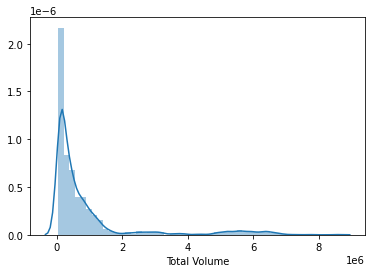

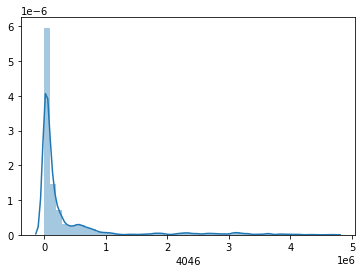

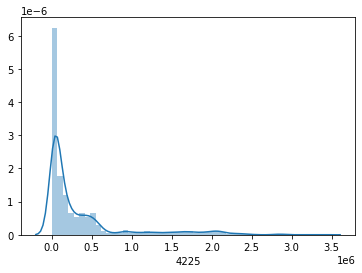

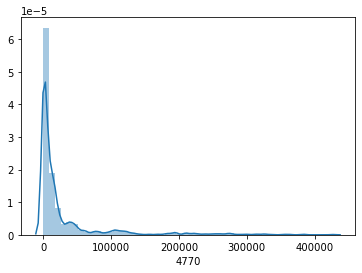

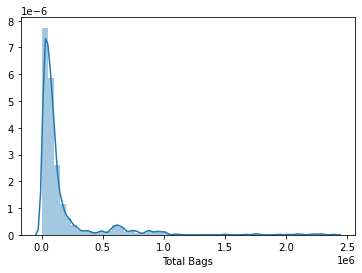

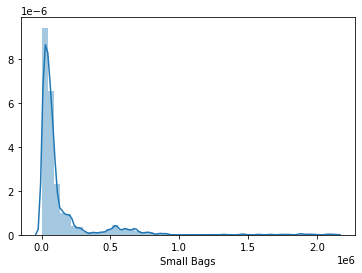

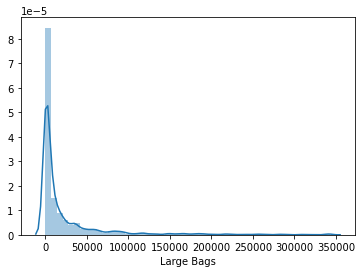

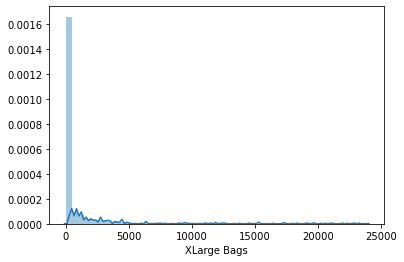

In [367]:
for i in visual:
    plt.figure(figsize=[6,4])
    sns.distplot(visual[i])

observation: All the features are higly right skewed.

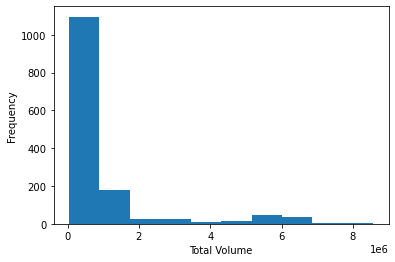

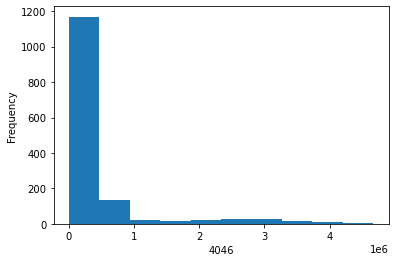

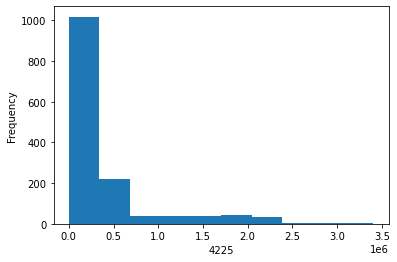

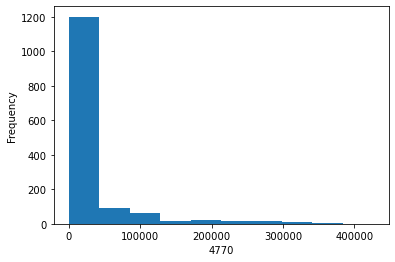

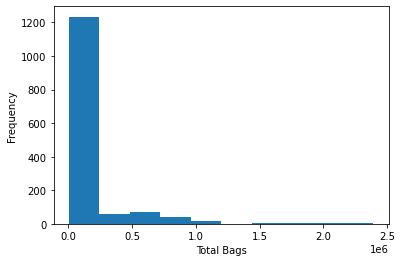

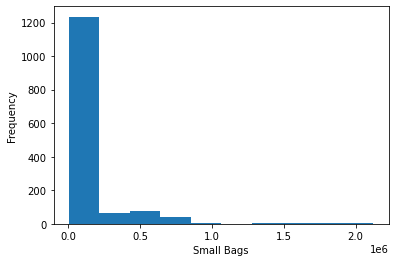

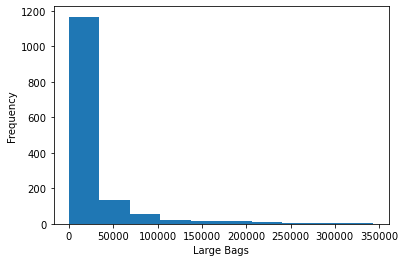

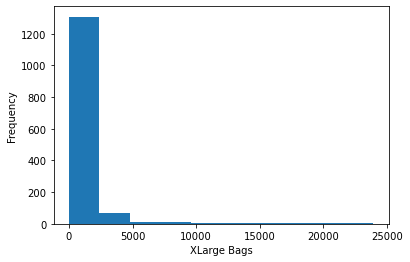

In [51]:
for i in visual:
    plt.figure(figsize=[6,4])
    plt.xlabel(i)
    visual[i].plot.hist()

observations:
1. Total volume: around 1200 observations lies between 0 to 2(le6).
2. 4046 : more than 1000 observations lies between 0 to 1(le6).
3. 4225: around 1200 observations lies between 0 to 2(le6).
4. 4770 : around 1200 observation lies betwenn 0 to 100000.
5. Total bags : More than 1200 observations lies between 0 to 0.5(le6).
6. Small bags : More than 1200 observations lies between 0 to 0.5(le6).
7. Large bags : around 1200 observation lies betwenn 0 to 50000.
8. XLarge bags : More than 1200 observations lies between 0 to 5000.

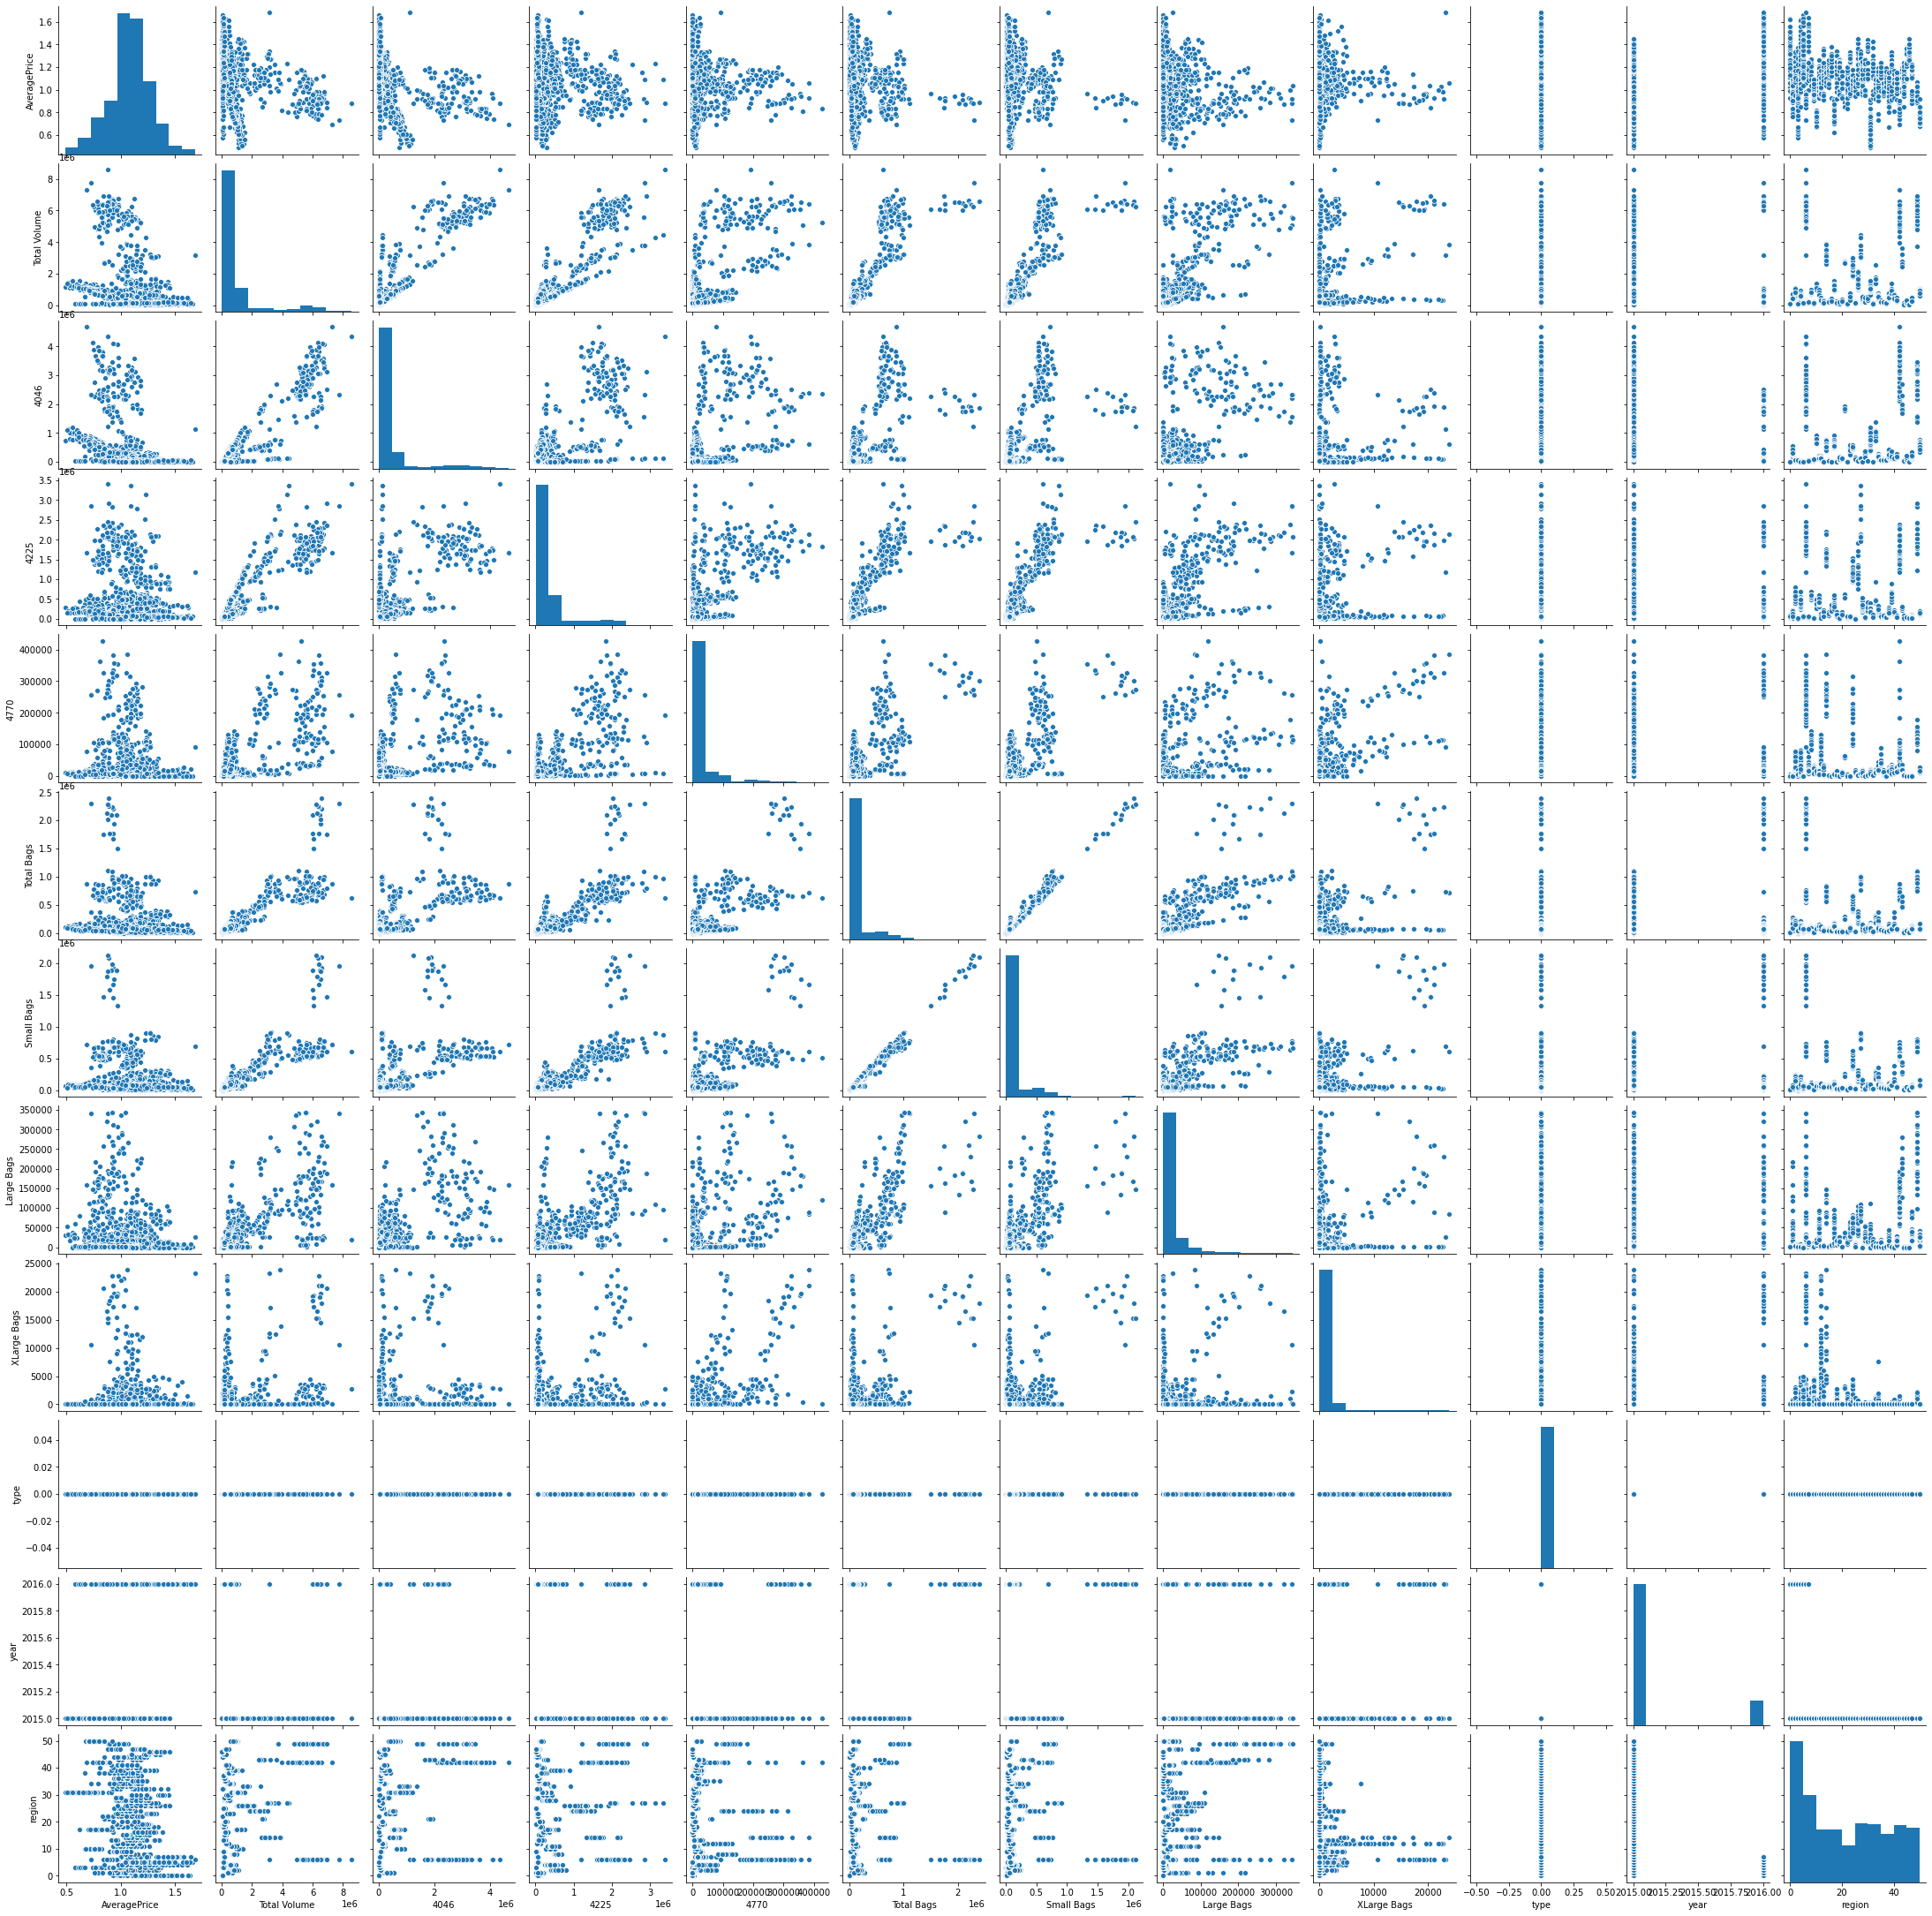

In [52]:
sns.pairplot(df_new)

Observations:
1. No such relationship wit the target variable
2. As number of of small bags increases there is sharp increase in total number of bags 

In [368]:
corr_matrix = df_new.corr()

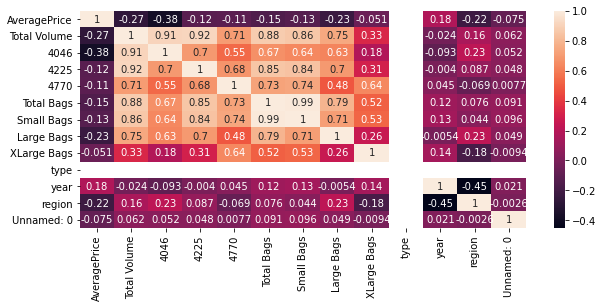

In [369]:
plt.figure(figsize = [10,4])
sns.heatmap(corr_matrix,annot = True)

observations: 
1. 4046 , 4225, 4770,Total bags,Small Bags,Large bags and Total volume are  highly correlated to each other from range(0.48 to 0.92)
2. almost all the features shows negative correlation with target variable.where  4046 (-0.38) is the most negatively corelated.
3. year and region are most negatively corelated ,i.e.,-0.45.

In [55]:
print(corr_matrix['AveragePrice'].sort_values(ascending = False))

AveragePrice    1.000000
year            0.182109
XLarge Bags    -0.050749
4770           -0.107163
4225           -0.117170
Small Bags     -0.129242
Total Bags     -0.151845
region         -0.215895
Large Bags     -0.228242
Total Volume   -0.266735
4046           -0.376074
type                 NaN
Name: AveragePrice, dtype: float64


observations: Year is the only feature positively corelated to target feature. where XLarge bags are least corelated.type has no relation with target feature and 4046 is tye most negatively correlated.

In [56]:
y = df_new["AveragePrice"]

In [57]:
#removing skewness

In [58]:
from sklearn.preprocessing import PowerTransformer

In [59]:
power = PowerTransformer()

In [61]:
x4 = df_new.drop("AveragePrice",axis =1) #x4

In [62]:
remove_skew1 = x4[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [63]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for i in remove_skew1:
    x4[i]= ms.fit_transform(x4[[i]])

In [371]:
x4["Unnamed: 0"] = ms.fit_transform(df_new[["Unnamed: 0"]])
x4

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Unnamed: 0
0,-1.373734,-1.251505,-0.719695,-1.193885,-1.695712,-1.584748,-0.891358,-0.854905,0,0.0,0,0.000000
1,-1.433970,-1.258526,-0.841093,-1.191744,-1.663538,-1.548117,-0.890888,-0.854905,0,0.0,0,0.019608
2,-1.051306,-1.256191,-0.165272,-1.176603,-1.717847,-1.610582,-0.890260,-0.854905,0,0.0,0,0.039216
3,-1.281447,-1.249663,-0.520741,-1.188747,-1.813284,-1.721879,-0.886864,-0.854905,0,0.0,0,0.058824
4,-1.459055,-1.253349,-0.851324,-1.188075,-1.797850,-1.707113,-0.879787,-0.854905,0,0.0,0,0.078431
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.678419,-0.362668,-0.696907,0.687475,-0.214178,-0.218102,0.042654,1.300223,0,0.0,7,0.196078
1513,-0.738561,-0.551275,-0.747052,0.767722,-0.137235,-0.082769,-0.091575,-0.854905,0,0.0,7,0.215686
1514,-0.737713,-0.509149,-0.738511,0.650289,-0.154407,-0.113150,-0.118497,1.319989,0,0.0,7,0.235294
1515,-0.686488,-0.406168,-0.730051,0.685821,-0.125119,-0.062149,-0.116888,-0.854905,0,0.0,7,0.254902


In [372]:
x4.skew()

Total Volume    0.163169
4046            0.278111
4225            0.233287
4770            0.261514
Total Bags      0.088351
Small Bags      0.104536
Large Bags      0.876007
XLarge Bags     0.401607
type            0.000000
year            0.000000
region          0.277518
Unnamed: 0     -0.246136
dtype: float64

In [66]:
for i in remove_skew1:
    x4[i] = power.fit_transform(x4[[i]])

In [373]:
x4.skew()

Total Volume    0.163169
4046            0.278111
4225            0.233287
4770            0.261514
Total Bags      0.088351
Small Bags      0.104536
Large Bags      0.876007
XLarge Bags     0.401607
type            0.000000
year            0.000000
region          0.277518
Unnamed: 0     -0.246136
dtype: float64

In [68]:
x4 = x4.drop("Date",axis =1)

In [374]:
#checking the best random state for the model accuracy
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x4,y,test_size = .20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = r2_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.4931061330661072 at random state :  75


Maximum accuracy is at random state 75.

In [375]:
x_train,x_test,y_train,y_test = train_test_split(x4,y,test_size = .20,random_state = 75)

In [376]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdlr))
print("Mean Squared error :",mean_squared_error(y_test,prdlr))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdlr))

Accuracy of the model : 0.4931061330661072
Mean Squared error : 0.021413488301971713
Mean Absolute eroor : 0.11366527524964301


In [377]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdtc))
print("Mean Squared error :",mean_squared_error(y_test,prdtc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdtc))

Accuracy of the model : 0.7974424999133117
Mean Squared error : 0.008556944444444442
Mean Absolute eroor : 0.06284722222222222


In [378]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
prrfc = rfc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prrfc))
print("Mean Squared error :",mean_squared_error(y_test,prrfc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prrfc))

Accuracy of the model : 0.8427611700749116
Mean Squared error : 0.006642478958333335
Mean Absolute eroor : 0.05655763888888884


In [379]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
prdsvr = svr.predict(x_test)
print("Accuracy of the SVR  model for is",r2_score(y_test,prdsvr))
print("Mean Squared error SVR  model for is",mean_squared_error(y_test,prdsvr))
print("Mean Absolute eroor SVR  model for is:",mean_absolute_error(y_test,prdsvr))

Accuracy of the SVR  model for is 0.5119124747272139
Mean Squared error SVR  model for is 0.020619023418032775
Mean Absolute eroor SVR  model for is: 0.1096944056003128


In [222]:
#cross value

In [380]:
from sklearn.model_selection import cross_val_score
cross_val1 = cross_val_score(LinearRegression(),x4,y,cv = 5)
print("Cross Validation score for Linear regression : ",(np.abs(cross_val1)).mean())

Cross Validation score for Linear regression :  0.23362377636754


In [385]:
cross_val2 = cross_val_score(RandomForestRegressor(),x4,y,cv = 5)
print("Cross Validation Score for Random Forest Regressor",np.abs(cross_val2.mean()))

Cross Validation Score for Random Forest Regressor 0.11934511049205691


In [383]:
cross_val3 = cross_val_score(DecisionTreeRegressor(),x4,y,cv = 5)
print("Cross Validation Score for Decision Tree Regressor",np.abs(cross_val3.mean()))

Cross Validation Score for Decision Tree Regressor 0.9161646670618641


In [384]:
cross_val4 = cross_val_score(SVR(),x4,y,cv = 5)
print("Cross Validation Score for SVR",np.abs(cross_val4.mean()))

Cross Validation Score for SVR 0.020766994288849316


As decision tree regressor has the minimum difference between the actual accuracy and cross value score.we'll be chossing DecisionTree regressor.

In [238]:
#hyperparameter tuning

In [239]:
from sklearn.model_selection import GridSearchCV

In [386]:
parameters = {'splitter': ["best","random"],
             'criterion' : ['friedman_mse','mse','mae']
             }

In [387]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [388]:
GVC = GridSearchCV(DecisionTreeRegressor(),parameters,cv =5)

In [389]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'splitter': ['best', 'random']})

In [390]:
GVC.best_params_

{'criterion': 'mae', 'splitter': 'best'}

In [391]:
mod2 = DecisionTreeRegressor(criterion='mae',splitter='best',random_state = 75)

In [392]:
mod2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', random_state=75)

In [393]:
pred3 = mod2.predict(x_test)

In [394]:
print("accuracy :" ,r2_score(y_test,pred3))

accuracy : 0.7081064559090016


In [398]:
#Testing model

In [395]:
conclusion = pd.DataFrame([mod2.predict(x_test)[:],prdtc[:]],index = ["predicted","original"])

In [396]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
predicted,1.04,0.72,0.98,1.24,0.97,0.91,1.21,1.05,0.71,0.90,...,1.24,1.15,1.15,1.05,0.98,0.96,0.79,1.05,0.83,0.96
original,1.10,0.71,1.08,1.11,0.97,1.03,1.21,1.12,0.71,0.93,...,1.21,1.15,1.16,0.89,0.98,0.97,1.04,1.02,0.92,0.96
